# Phase III: First ML Proof of Concept (5\%)

### Team Names:
- Melanie Yu
- Yunhan Luo
- Ani McCaskill
- Owen Sweetman

## Part 1: First ML model using Numpy
(3%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

In [14]:
df = pd.read_csv("csv_files/cleaned_video_data.csv")
df.head()

,video_id,title,published,views,likes,comments,duration,tags
0,9oYHU1hdDog,"Agents, AI & The Next Wave: Mike Clark on Vert...",2025-11-21T00:00:10Z,1590,42,13,7.379008,"['Google', 'developers', 'pr_pr: Google Develo..."
1,9EGtawwvlNs,Build an AI Agent with Gemini 3,2025-11-20T21:45:49Z,65403,2016,97,5.948035,"['Google', 'developers', 'pr_pr: AI DevRel (fk..."
2,sCXuCczPE8A,What's on the newsdesk for Google Developers t...,2025-11-20T20:00:55Z,3051,35,3,3.526361,"['Google', 'developers', 'pr_pr: Google for De..."
3,hunRGj4Bpb0,Keep your code fresh and clean with YAGNI!,2025-11-20T19:30:53Z,6688,176,6,3.526361,"['Google', 'developers', 'pr_pr: Google for De..."
4,L0QHMLx02l4,"Introducing ADK Go, User Simulator, and more! ...",2025-11-20T17:02:19Z,4880,126,4,4.882802,"['Google', 'developers', 'pr_pr: Google for De..."


y = 0.0043x + 0.002



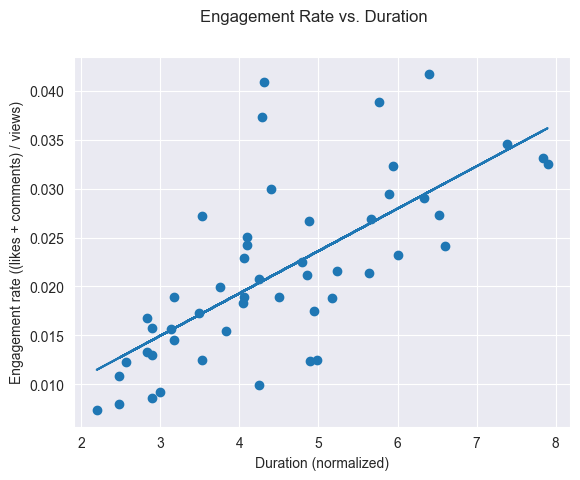

In [15]:
engagement_rate = ((df["likes"] + df["comments"]) / df["views"])
duration = df['duration']

# add bias column
X = np.column_stack((np.ones(len(duration)), duration))
y = engagement_rate

m = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
print(f"y = {round(m[1], 4)}x + {round(m[0], 4)}")

plt.scatter(duration, engagement_rate)
plt.plot(duration, m[1]*duration+m[0])
plt.xlabel('Duration (normalized)')
plt.ylabel('Engagement rate ((likes + comments) / views)')
plt.suptitle('Engagement Rate vs. Duration')
print()

## Model 1 Analysis

In [16]:
# Calculate predictions and residuals
y_pred = m[1] * duration + m[0]
residuals = y - y_pred

# Calculate metrics
mse = np.mean(residuals ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum(residuals ** 2)
r2 = 1 - (ss_res / ss_tot)

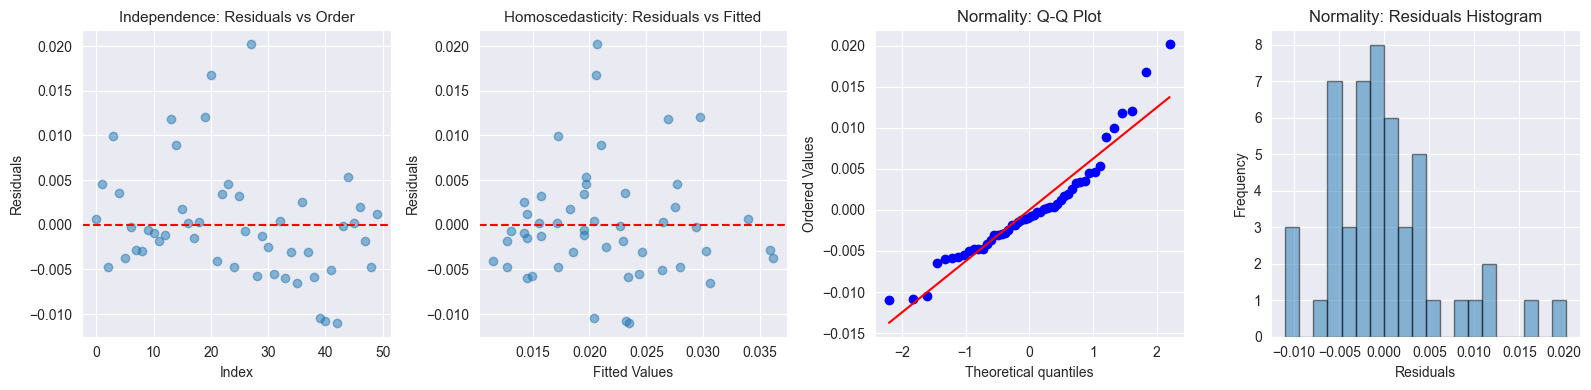

In [17]:
# Create 4-panel diagnostic plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot 1: Independence - Residuals vs Order
axes[0].scatter(range(len(residuals)), residuals, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Independence: Residuals vs Order', size=11)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Residuals')

# Plot 2: Homoscedasticity - Residuals vs Fitted
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Homoscedasticity: Residuals vs Fitted', size=11)
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')

# Plot 3: Normality - Q-Q Plot
probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Normality: Q-Q Plot')

# Plot 4: Normality - Histogram
axes[3].hist(residuals, bins=20, edgecolor='black', alpha=0.5)
axes[3].set_title('Normality: Residuals Histogram')
axes[3].set_xlabel('Residuals')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

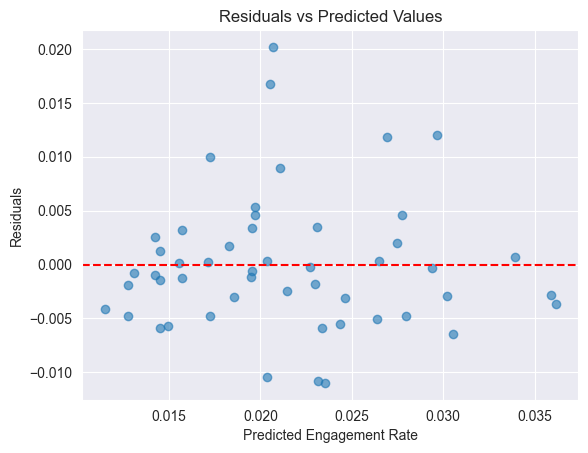

In [18]:
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Engagement Rate")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")

plt.show()

In [19]:
# Measures of fit
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 0.006283254247267489
MAE: 0.00454219028747779


The Engagement Rate vs. Duration scatterplot shows a positive linear relationship, meaning as duration increases, engagement rate also tends to increase. This implies that longer videos have a higher engagement rate. There is some variability in the plot, indicating that duration does not fully explain engagement rate. The Residuals vs. Order plot appears randomly scattered with no visible patterns or systematic trends. This supports the assumption of independence of errors, meaning each error is a separate and independent value that cannot predict any other error in the set. The Residuals vs. Fitted Values plot is roughly uniform across the entire range with no funnel shape or curvature. A few mild outliers appear on the graph, but the plot still overall supports the homoscedasticity assumption. On the Q-Q plot, most points fall close to the red theoretical line, meaning they are approximately normally distributed despite some deviations at the tail ends. The histogram of residuals appears roughly symmetric with a peak around zero, further supporting normality assumptions. Finally, on the Residuals vs. Predicted Values chart, the points appear randomly scattered about zero with no curved or U-shaped patterns. This suggests that the relationship between duration and engagement is reasonably linear and that the linear regression model is not missing any non-linear patterns.

The RMSE (Root Mean Squared Error) value of .00617 indicates that, on average, the model is off by around 0.6 percentage points of engagement rate. This is a reasonable level of error, especially since most engagement rates fall around 1 to 4%. The MAE (Mean Average Error) value of .00436 indicates that predictions miss by about .4 percentage poitns of engagement on average. Both values are relatively small, meaning that the model has decent predictive accuracy, although it is not perfect.

Overall, there are not many notable ethical concerns with this dataset. Because it uses aggregate, publicly available video statistics instead of personal user data, ethical risks concerning privacy are very low. Where most ethical risks lie are with the term "engagement rate" itself. For one, the videos used are pulled from a specific niche of software engineering, machine learning, and AI based videos. Thus, results from this project may not generalize to all genres of YouTube videos and reinforce assumptions about what performs best from this specific niche. Engagement rate also does not neccesarily reflect content quality or value, so placing too much weight on this as a predictor could push creators to clickbait or overly algorithm-driven videos that prioritize numbers over content or audience well-being. These risks, however, are largely minimized by the fact that this project is not neccesarily intended for distribution to YouTube creators, making those risks low and far more manageable.

## Model 2

## Model 2 Analysis

In [20]:
# placeholder values
m = [1, 2, 3, 4]

# Calculate predictions and residuals
y_pred = m[1] * duration + m[0]
residuals = y - y_pred

# Calculate metrics
mse = np.mean(residuals ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum(residuals ** 2)
r2 = 1 - (ss_res / ss_tot)

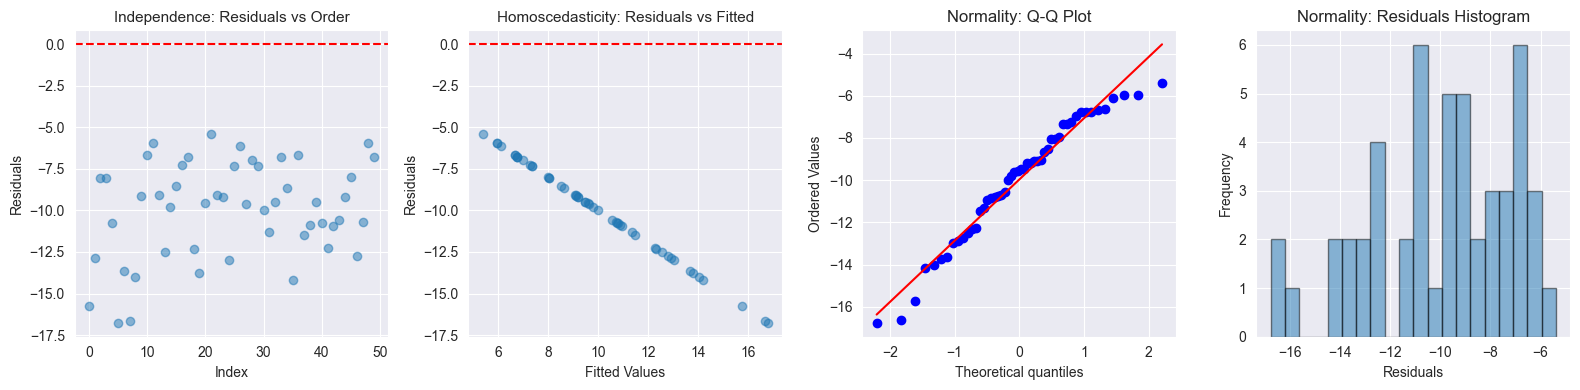

In [21]:
# Create 4-panel diagnostic plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot 1: Independence - Residuals vs Order
axes[0].scatter(range(len(residuals)), residuals, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Independence: Residuals vs Order', size=11)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Residuals')

# Plot 2: Homoscedasticity - Residuals vs Fitted
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Homoscedasticity: Residuals vs Fitted', size=11)
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')

# Plot 3: Normality - Q-Q Plot
probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Normality: Q-Q Plot')

# Plot 4: Normality - Histogram
axes[3].hist(residuals, bins=20, edgecolor='black', alpha=0.5)
axes[3].set_title('Normality: Residuals Histogram')
axes[3].set_xlabel('Residuals')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()